In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import tensorflow as tf
#from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import numpy as np
from tensorflow.python.keras.layers.core import *
from tensorflow.python.keras.layers import Conv1D, MaxPooling1D, SimpleRNN, Bidirectional, Input
from tensorflow.python.keras.models import Model, Sequential
from keras.layers import Input, LSTM, Dense, TimeDistributed, Activation, BatchNormalization, Dropout, Bidirectional
from keras.models import Sequential
from keras.utils import Sequence

C:\Users\estre\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\estre\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\estre\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\estre\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

ModuleNotFoundError: No module named 'keras'

In [21]:
df = pd.read_csv(r'C:\Users\estre\Downloads\coin_Cardano.csv', parse_dates=['Date'])
df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Cardano,ADA,2017-10-02 23:59:59,0.030088,0.019969,0.024607,0.025932,57641300.0,6.288991e+08
1,2,Cardano,ADA,2017-10-03 23:59:59,0.027425,0.020690,0.025757,0.020816,16997800.0,5.396927e+08
2,3,Cardano,ADA,2017-10-04 23:59:59,0.022806,0.020864,0.020864,0.021931,9000050.0,5.686195e+08
3,4,Cardano,ADA,2017-10-05 23:59:59,0.022154,0.020859,0.021951,0.021489,5562510.0,5.571390e+08
4,5,Cardano,ADA,2017-10-06 23:59:59,0.021542,0.018360,0.021359,0.018539,7780710.0,4.806646e+08


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1245 entries, 0 to 1244
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   SNo        1245 non-null   int64         
 1   Name       1245 non-null   object        
 2   Symbol     1245 non-null   object        
 3   Date       1245 non-null   datetime64[ns]
 4   High       1245 non-null   float64       
 5   Low        1245 non-null   float64       
 6   Open       1245 non-null   float64       
 7   Close      1245 non-null   float64       
 8   Volume     1245 non-null   float64       
 9   Marketcap  1245 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(2)
memory usage: 97.4+ KB


In [23]:
df.describe()

,SNo,High,Low,Open,Close,Volume,Marketcap
count,1245.000000,1245.000000,1245.000000,1245.000000,1245.000000,1.245000e+03,1.245000e+03
mean,623.000000,0.146055,0.129342,0.137758,0.138757,4.729622e+08,3.788101e+09
std,359.544851,0.190901,0.159500,0.174933,0.177812,1.427985e+09,5.099696e+09
min,1.000000,0.021050,0.017620,0.018414,0.018539,1.739460e+06,4.806646e+08
25%,312.000000,0.045570,0.042981,0.044286,0.044328,4.642072e+07,1.149308e+09
50%,623.000000,0.083514,0.077631,0.080869,0.080952,1.011906e+08,2.102088e+09
75%,934.000000,0.149314,0.138102,0.143086,0.143573,2.576860e+08,3.779666e+09
max,1245.000000,1.476653,1.234138,1.242145,1.324860,1.914198e+10,4.121970e+10


In [24]:
# Formatting the time 

df['Date'] = pd.to_datetime(df['Date']).dt.date
df.set_index("Date", inplace=True)
#choose close col as price prediction
df=df[["Close"]]
#remove all na val
df.dropna(inplace=True)


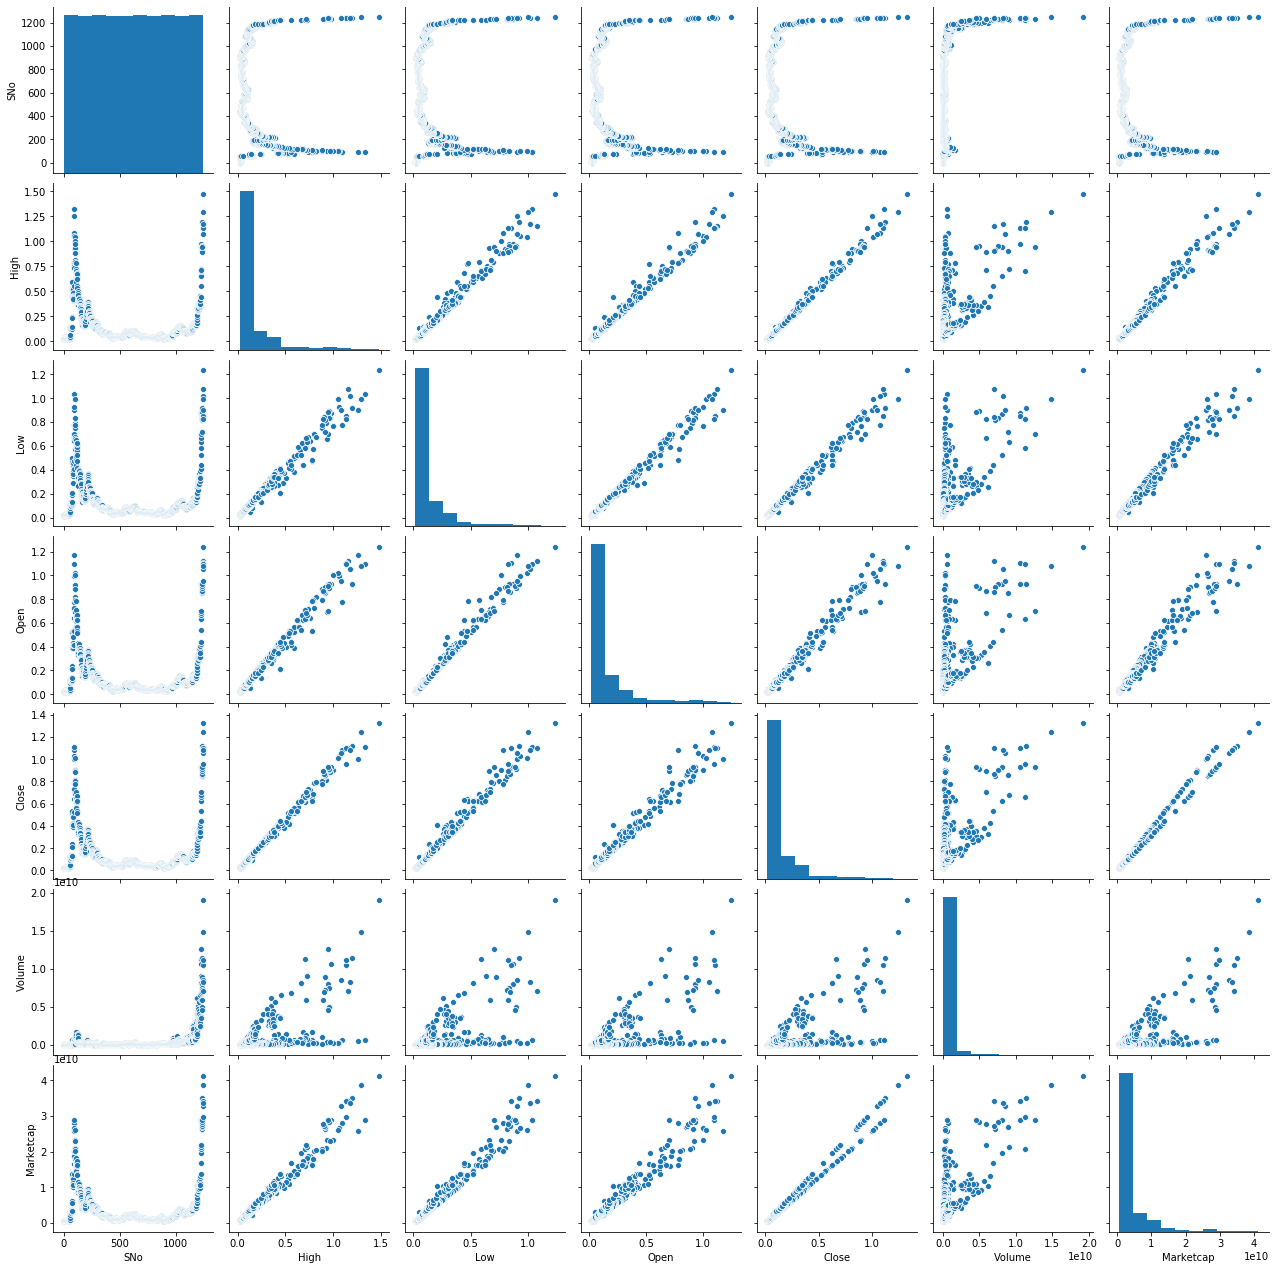

In [6]:
sns.pairplot(df)

Text(0.5, 1.0, 'Price Cardano')

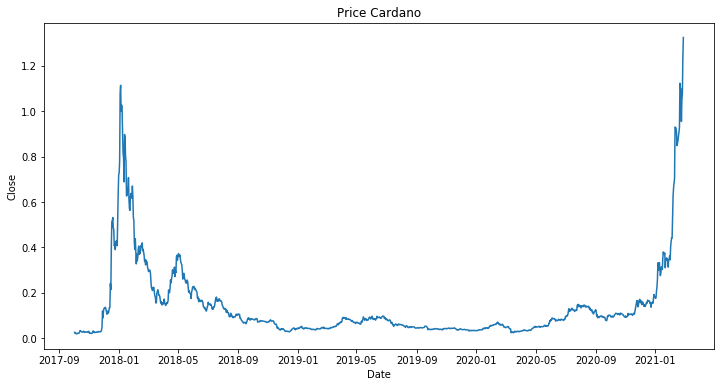

In [25]:
plt.figure(figsize=(12,6))
sns.lineplot(x=df.index, y="Close", data=df).set_title("Price Cardano")

In [7]:
Date_Marketcap = df[['Date','Marketcap']]
Date_Marketcap.head()

,Date,Marketcap
0,2017-10-02,6.288991e+08
1,2017-10-03,5.396927e+08
2,2017-10-04,5.686195e+08
3,2017-10-05,5.571390e+08
4,2017-10-06,4.806646e+08


Text(0, 0.5, 'Marketcap')

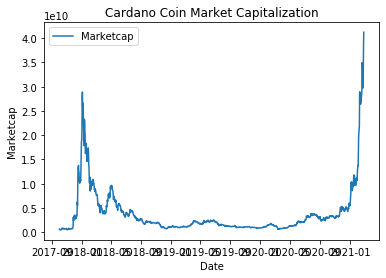

In [11]:
#  Market capitalization refers to the total dollar market value of a company's outstanding shares of stock. 
# Market Capitalization growth throughout the years
TimevsMarketcap = Date_Marketcap.set_index('Date')
TimevsMarketcap.plot()
plt.title('Cardano Coin Market Capitalization')
plt.xlabel('Date')
plt.ylabel('Marketcap')

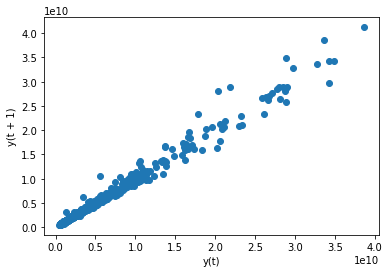

In [9]:
pd.plotting.lag_plot(df['Marketcap'])

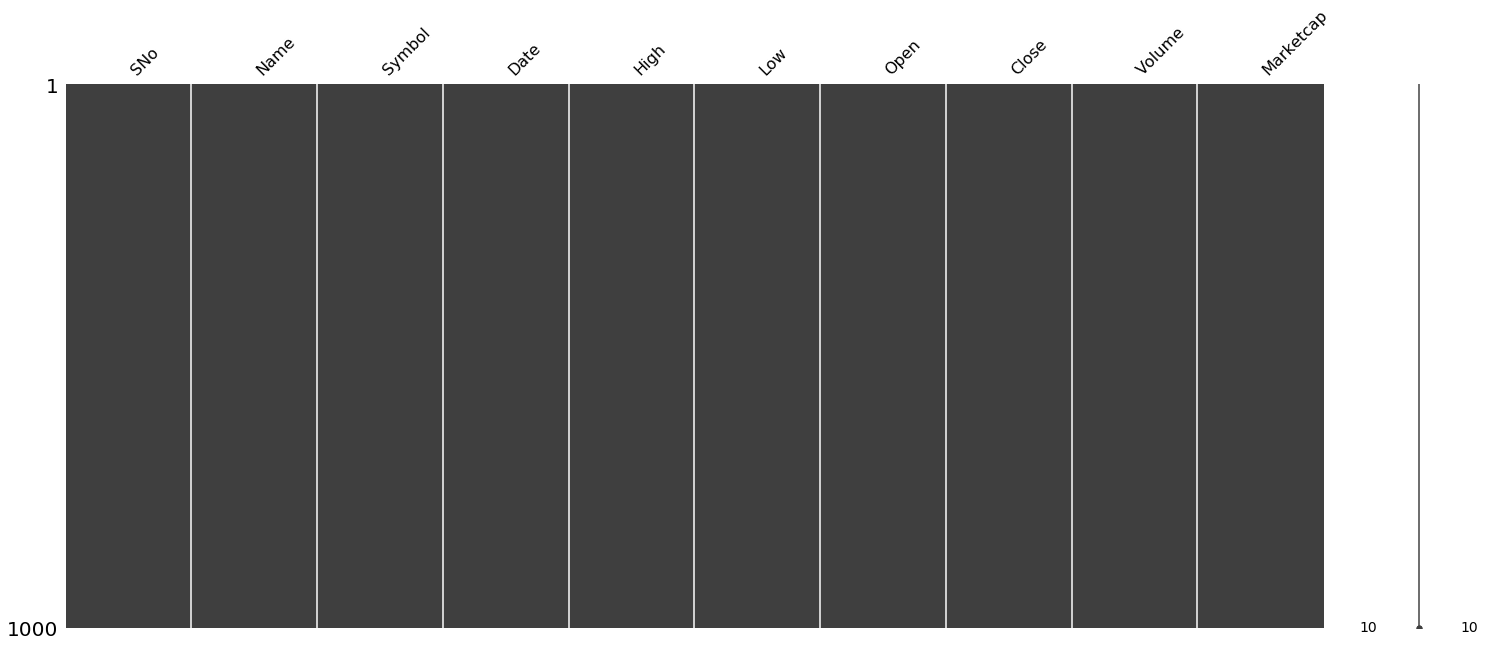

In [14]:
import missingno as msno
%matplotlib inline
msno.matrix(df.sample(1000))